# Neural Networks

## 1. Introduction

Neural networks rely on training data to learn and improve their accuracy over time. However, once these learning algorithms are fine-tuned for accuracy, they are powerful tools in computer science and artificial intelligence, allowing us to classify and cluster data at a high velocity. Tasks in speech recognition or image recognition can take minutes versus hours when compared to the manual identification by human experts. One of the most well-known neural networks is Google’s search algorithm.

---
## 2. Application

### MNIST Data Set

The MNIST data set consists of 70,000 images of hand written digits, 60,000 of which are typically used as labeled training examples and the other 10,000 used for testing your learning model on. The following picture represent a sample of some of the images.

In [32]:
#!pip install tensorflow
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt

# Use the keras module to import the necessary data 
(train_X, train_y), (test_X, test_y) = keras.datasets.mnist.load_data()

In [33]:
# This cell should be run inplace of the cell directly above
print(f"np.shape(train_X) ={np.shape(train_X)}")
print(f"np.shape(test_X) = {np.shape(test_X)} \n")

print(f"np.shape(train_X[0]) = {np.shape(train_X[0])}")
print(f"np.shape(test_X[0]) = {np.shape(test_X[0])} \n")

print(f"train_X[0] = {train_X[1]}")

np.shape(train_X) =(60000, 28, 28)
np.shape(test_X) = (10000, 28, 28) 

np.shape(train_X[0]) = (28, 28)
np.shape(test_X[0]) = (28, 28) 

train_X[0] = [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  

train_y[0] = 5 



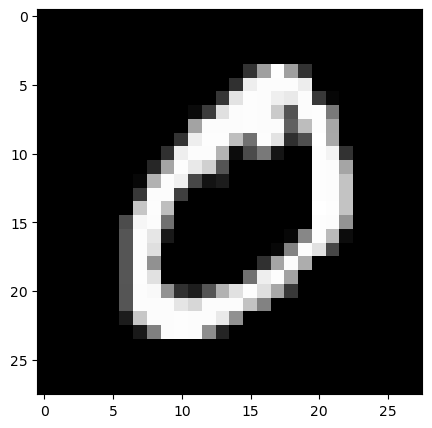

In [34]:
print(f"{train_y[0] = } \n")
plt.figure(figsize=(6, 5))
plt.imshow(train_X[1], cmap="gray")
plt.show()

In [35]:
# Scale the data for training. 
train_X = train_X/255
test_X = test_X/255

# Flatten the training images into coloumn vectors. 
flat_train_X = []
# One hot encode the training labels
onehot_train_y = []

for x, y in zip(train_X, train_y):
    flat_train_X.append(x.flatten().reshape(784, 1))
    temp_vec = np.zeros((10, 1))
    temp_vec[y][0] = 1.0
    onehot_train_y.append(temp_vec)
   

# Do the same for the testing data 
flat_test_X = []
onehot_test_y = []

for x, y in zip(test_X, test_y):
    flat_test_X.append(x.flatten().reshape(784, 1))
    temp_vec = np.zeros((10, 1))
    temp_vec[y] = 1.0
    onehot_test_y.append(temp_vec)

---

### 2.1 Building the Network Architecture 
For our purposes, we will build a multilayered **fully connected**, or **dense**, neural network with $L$ layers, $784$ input notes, $L-2$ hidden layers of arbitrary size, and $10$ output nodes. 

For our activation function, we will use the sigmoid function:

* Sigmoid Function
$$
\sigma(z) = \frac{1}{1+e^{-z}}.
$$

For our cost function, we will use the Mean Sqaure Error cost:
$$
C(W, b) = \frac{1}{2}\sum_{k=1}^{10}(\hat{y}^{(i)}_k - y^{(i)}_k)^2.
$$

Our goal will be to write a custom Python class implementing our desired structure. However, before doing so, we first sequentually write functions to better understand the process of programming the following:

* Initializing the weights and biases of each layer
* The feedforward phase
* Calculation of the cost function
* Calculation of the gradient
* Iterating stochastic gradient descent

First we will define our sigmoid activation function, its derivative, and the mean squared error for a single instance of training data. Do this by running the following code. 

---

In [36]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

def d_sigmoid(z):
    return sigmoid(z)*(1.0 - sigmoid(z))

def mse(a, y):
    return .5*sum((a[i] - y[i])**2 for i in range(10))[0]

In [37]:
def initialize_weights(layers = [784, 60, 60, 10]):
    # The following Python lists will contain numpy matrices
    # connected the layers in the neural network 
    W = [[0.0]]
    B = [[0.0]]
    for i in range(1, len(layers)):
        # The scalling factor is something I found in a research paper :)
        w_temp = np.random.randn(layers[i], layers[i-1])*np.sqrt(2/layers[i-1])
        b_temp = np.random.randn(layers[i], 1)*np.sqrt(2/layers[i-1])
    
        W.append(w_temp)
        B.append(b_temp)
    return W, B

---

### 2.2 Feedforward Phase

For $\ell = 1, \dots, L$, each layer $\ell$ in our network will have two phases, the preactivation phase $$\mathbf{z}^{\ell} = W^{\ell}\mathbf{a}^{\ell-1} + \mathbf{b}^{\ell},$$ and postactivation phase $$\mathbf{a}^{\ell} = \sigma(\mathbf{z}^{\ell}).$$ The preactivation phase consists of a weighted linear combination of postactivation values in the previous layer. The postactivation values consists of passing the preactivation value through an activation function elementwise. Note $\mathbf{a}^0 = \mathbf{x}^{(i)}$, where $\mathbf{x}^{(i)}$ is the current input data into our network. 

We can test our activation functions and matrix dimensions by running the following code which manually implements the feedforward process on a neural network with the given dimensions.

---

In [38]:
W, B = initialize_weights()

xi = flat_train_X[0]
yi = onehot_train_y[0]
a0 = xi

print(f"np.shape(a0) = {np.shape(a0)} \n")

z1 = W[1] @ a0 + B[1]
a1 = sigmoid(z1)

print(f"np.shape(W[1]) = {np.shape(W[1])}")
print(f"np.shape(z1) = {np.shape(z1)}")
print(f"np.shape(a1) = {np.shape(a1)} \n")

z2 = W[2] @ a1 + B[2]
a2 = sigmoid(z2)

print(f"np.shape(W[2]) = {np.shape(W[2])}")
print(f"np.shape(z2) = {np.shape(z2)}")
print(f"np.shape(a2) = {np.shape(a2)} \n")

z3 = W[3] @ a2 + B[3]
a3 = sigmoid(z3)
y_hat = a3
print(f"np.shape(W[3]) = {np.shape(W[3])}")
print(f"np.shape(z3) = {np.shape(z3)}")
print(f"np.shape(a3) = {np.shape(a3)} \n")


print(f"Prediction: np.argmax(y_hat) = {np.argmax(y_hat)}")
print(f"Target Label: np.argmax(yi) = {np.argmax(yi)}")
print(f"mse(y_hat, yi) = {mse(y_hat, yi)}")

np.shape(a0) = (784, 1) 

np.shape(W[1]) = (60, 784)
np.shape(z1) = (60, 1)
np.shape(a1) = (60, 1) 

np.shape(W[2]) = (60, 60)
np.shape(z2) = (60, 1)
np.shape(a2) = (60, 1) 

np.shape(W[3]) = (10, 60)
np.shape(z3) = (10, 1)
np.shape(a3) = (10, 1) 

Prediction: np.argmax(y_hat) = 0
Target Label: np.argmax(yi) = 5
mse(y_hat, yi) = 1.6663123480376425


In [39]:
def forward_pass(W, B, xi, predict_vector = False):
    Z = [[0.0]]
    A = [xi]
    L = len(W) - 1
    for i in range(1, L + 1):
        z = W[i] @ A[i-1] + B[i]
        Z.append(z)
        
        a = sigmoid(z)
        A.append(a)
        
    if predict_vector == False:
        return Z, A
    else:
        return A[-1]

def predict(W, B, xi):
    _, A = forward_pass(W, B, xi)
    return np.argmax(A[-1])

y_hat = forward_pass(W, B, flat_train_X[0], predict_vector=True)
print(f"Prediction: np.argmax(y_hat) = {np.argmax(y_hat)}")
print(f"Target Label: np.argmax(yi) = {np.argmax(yi)}")
print(f"mse(y_hat, yi) = {mse(y_hat, yi)}")

Prediction: np.argmax(y_hat) = 0
Target Label: np.argmax(yi) = 5
mse(y_hat, yi) = 1.6663123480376425


In [40]:

def random_experiment(W, B, data_features, data_labels):
    i = np.random.randint(len(data_features))
    print(f"Actual label: {np.argmax(data_labels[i])}")
    print(f"Predicted label: {predict(W, B, data_features[i])}")
    

def MSE(W, B, X, y):
    cost = 0.0
    m = 0
    for xi, yi in zip(X, y):
        a = forward_pass(W, B, xi, predict_vector = True)
        cost += mse(a, yi)
        m+=1
    return cost/m

In [41]:
print(f"MSE(W, B, flat_train_X, onehot_train_y) = {MSE(W, B, flat_train_X, onehot_train_y)} \n")

random_experiment(W, B, flat_train_X, onehot_train_y)

MSE(W, B, flat_train_X, onehot_train_y) = 1.5550637395481794 

Actual label: 3
Predicted label: 0


---

### 2.3 Backpropogation Phase with Stochastic Gradient Descent 
We are now ready to define a custom Python ```DenseNetwork``` class which initializes the weights and bias for the network, and implements stochastic gradient descent shown below:

1. For each $i = 1, \dots, N$.
2. Feedforward $\mathbf{x}^{(i)}$ into the network. 
3. Compute $\delta^{L} = \nabla_aC\otimes \sigma'(\mathbf{z}^{L})$.
4. For $\ell = L-1, \dots, 1$, compute $\delta^{\ell} = \big ( (\mathbf{w}^{\ell + 1})^{T} \delta^{\ell + 1} \Big )\otimes \sigma'(\mathbf{z}^{\ell})$.
5. For $\ell = L, L-1, \dots, 1$, 

$$
w^{\ell} \leftarrow w^{\ell} - \alpha \delta^{\ell}(\mathbf{a}^{\ell-1})^{T}
$$

$$
b^{\ell} \leftarrow b^{\ell} - \alpha \delta^{\ell}
$$


---

In [42]:

class DenseNetwork(object):
    def __init__(self, layers = [784, 60, 60, 10]):
        self.layers = layers
        self.W, self.B = initialize_weights(layers = self.layers)

    def train(self, X_train, y_train, alpha = 0.046, epochs = 4):
        # Print the initial mean squared error
        self.errors_ = [MSE(self.W, self.B, X_train, y_train)]
        print(f"Starting Cost = {self.errors_[0]}")

        # Find your sample size
        sample_size = len(X_train)

        # Find the number of non-input layers.
        L = len(self.layers) - 1

        # For each epoch perform stochastic gradient descent. 
        for k in range(epochs):
            # Loop over each (xi, yi) training pair of data.
            for xi, yi in zip(X_train, y_train):
                # Use the forward pass function defined before
                # and find the preactivation and postactivation values.
                Z, A = forward_pass(self.W, self.B, xi)

                # Store the errors in a dictionary for clear interpretation
                # of computation of these values.
                deltas = dict()

                # Compute the output error 
                output_error = (A[L] - yi)*d_sigmoid(Z[L])
                deltas[L] = output_error

                # Loop from L-1 to 1. Recall the right entry of the range function 
                # is non-inclusive. 
                for i in range(L-1, 0, -1):
                    # Compute the node errors at each hidden layer
                    deltas[i] = (self.W[i+1].T @ deltas[i+1])*d_sigmoid(Z[i])

                # Loop over each hidden layer and the output layer to perform gradient 
                # descent. 
                for i in range(1, L+1):
                    self.W[i] -= alpha*deltas[i] @ A[i-1].T
                    self.B[i] -= alpha*deltas[i]

            # Show the user the cost over all training examples
            self.errors_.append(MSE(self.W, self.B, X_train, y_train))   
            print(f"{k + 1}-Epoch Cost = {self.errors_[-1]}")
    

    def predict(self, xi):
        depth = len(self.layers)
        _, A = forward_pass(self.W, self.B, xi)
        return np.argmax(A[-1])

MSE(net.W, net.B, flat_train_X, onehot_train_y) = 1.6754205836501312 

predicted digit is: 5
actual digit is: 2


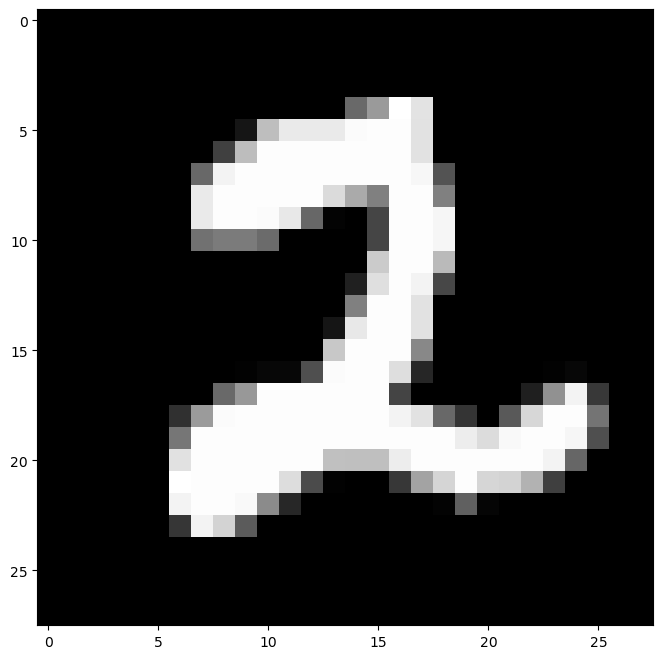

In [43]:
# Initialize a network with 784 input nodes, two hidden layers with 60 nodes each 
# and a output layer with 10 nodes. 
net = DenseNetwork(layers = [784, 120, 145, 120, 10])

# Check the mean squared error before training 
print(f"MSE(net.W, net.B, flat_train_X, onehot_train_y) = {MSE(net.W, net.B, flat_train_X, onehot_train_y)} \n")

# Make a random prediction before training
i = np.random.randint(0, len(flat_test_X))
prediction = net.predict(flat_test_X[i])
print(f"predicted digit is: {prediction}")
print(f"actual digit is: {np.argmax(onehot_test_y[i])}")
plt.figure(figsize=(8, 8))
plt.imshow(test_X[i], cmap="gray")
plt.show()

In [44]:
# Train your network with stochastic gradient descent!
net.train(flat_train_X, onehot_train_y)

Starting Cost = 1.6754205836501312
1-Epoch Cost = 0.08262496252290241
2-Epoch Cost = 0.05412382845692017
3-Epoch Cost = 0.04080631598673026
4-Epoch Cost = 0.032886771080863804


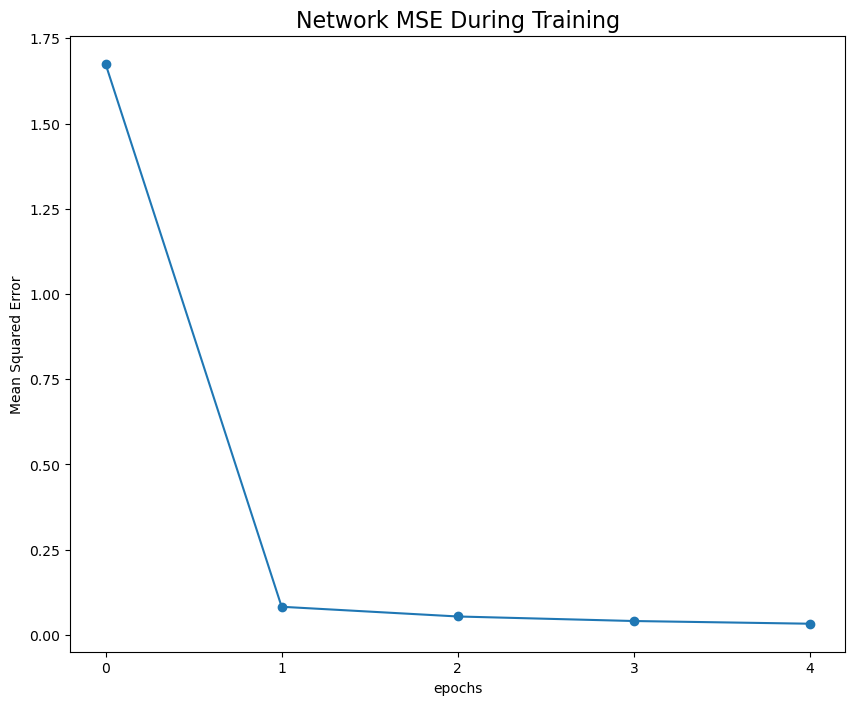

In [45]:
# Visualize the mean squared error over the training process 
plt.figure(figsize = (10, 8))
epochs = range(len(net.errors_))
plt.plot(epochs, net.errors_, marker = "o")
plt.xticks(epochs)
plt.xlabel("epochs")
plt.ylabel("Mean Squared Error")
plt.title("Network MSE During Training", fontsize = 16)
plt.show()


predicted digit is: 5
actual digit is: 5


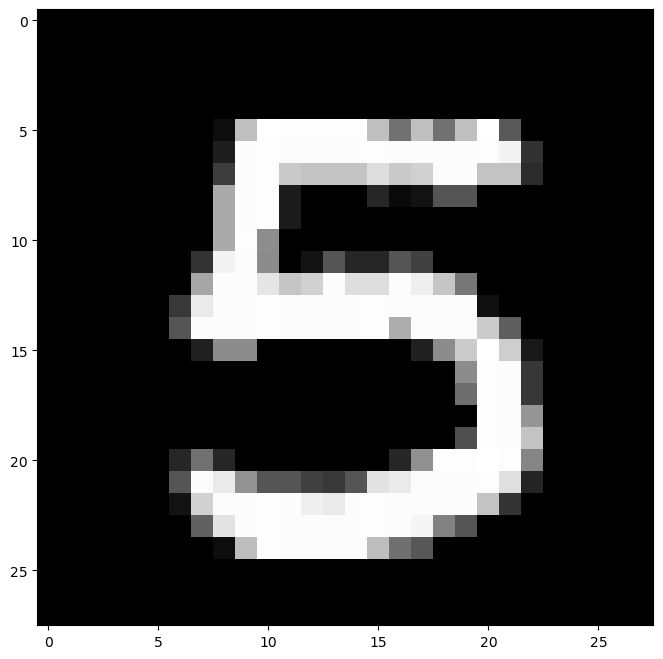

In [46]:
i = np.random.randint(0, len(flat_test_X))
prediction = net.predict(flat_test_X[i])
print(f"predicted digit is: {prediction}")
print(f"actual digit is: {np.argmax(onehot_test_y[i])}")
plt.figure(figsize=(8, 8))
plt.imshow(test_X[i], cmap="gray")
plt.show()

predicted digit is: 8
actual digit is: 8


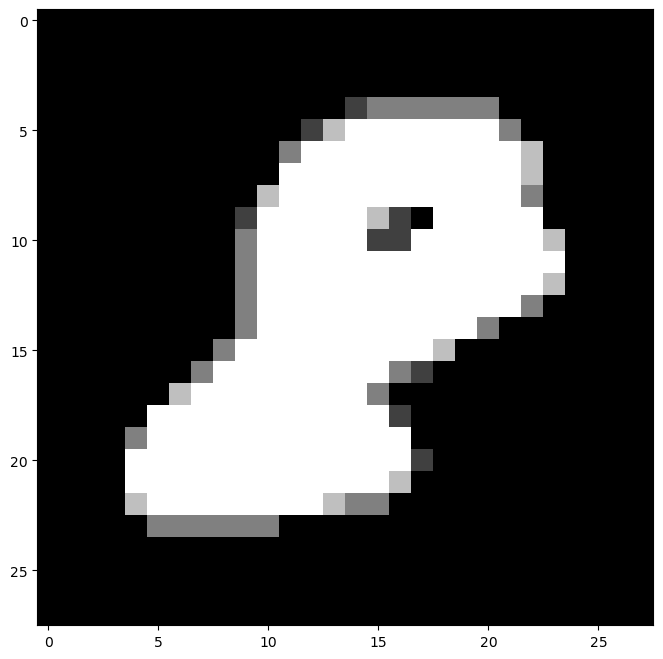

In [48]:
i = np.random.randint(0, len(flat_test_X))
prediction = net.predict(flat_test_X[i])
print(f"predicted digit is: {prediction}")
print(f"actual digit is: {np.argmax(onehot_test_y[i])}")
plt.figure(figsize=(8, 8))
plt.imshow(test_X[i], cmap="gray")
plt.show()

predicted digit is: 6
actual digit is: 6


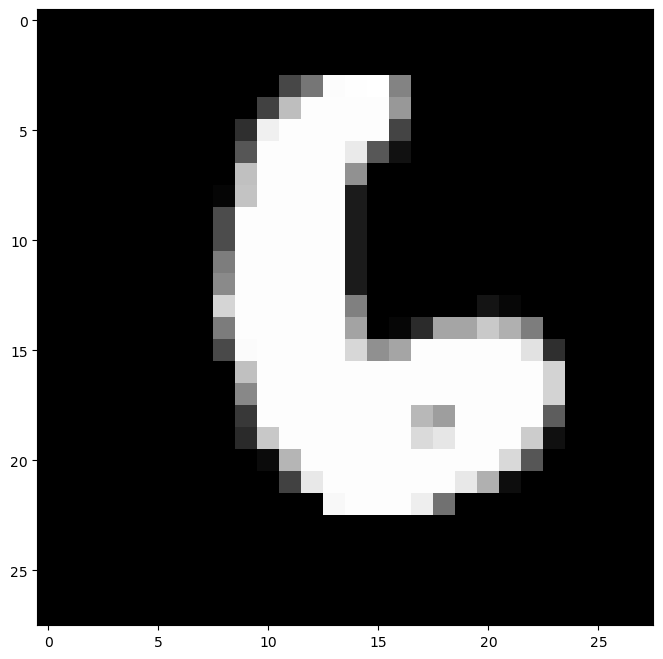

In [49]:
i = np.random.randint(0, len(flat_test_X))
prediction = net.predict(flat_test_X[i])
print(f"predicted digit is: {prediction}")
print(f"actual digit is: {np.argmax(onehot_test_y[i])}")
plt.figure(figsize=(8, 8))
plt.imshow(test_X[i], cmap="gray")
plt.show()

### 2.4 Classification Error

In [50]:
# Compute the classification accuracy of our trained model on the test data (I bet we did well!)
sum([int(net.predict(x) == y) for x, y in zip(flat_test_X, test_y)])/len(onehot_test_y)

0.955